# Rainfall classification applying KNN Algorithm

## Md. Mobinul Islam, 
## ID- 201900202066

**Let’s start the programming by importing essential libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

**Importing of the dataset and slicing it into independent and dependent variables

In [2]:
df = pd.read_excel('C:/Users/kptech/Downloads/rainfall_data.xlsx')

In [3]:
X = df.iloc[:, [1, 2, 3]].values
y = df.iloc[:, -1].values

**Since our dataset containing character variables we have to encode it using LabelEncoder

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

**We are performing a train test split on the dataset. We are providing the test size as 0.20, that means our training sample contains 512 training set and test sample contains 128 test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

**Next, we are doing feature scaling to the training and test set of independent variables for reducing the size to smaller values

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Now we have to create and train the K Nearest Neighbor model with the training set

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
clf = classifier.fit(X_train, y_train)
clf

KNeighborsClassifier(n_neighbors=3)

**We are using 3 parameters in the model creation. n_neighbors is setting as 5, which means 5 neighborhood points are required for classifying a given point. The distance metric we are using is Minkowski, the equation for it is given below






As per the equation, we have to select the p-value also.
p = 1 , Manhattan Distance
p = 2 , Euclidean Distance
p = infinity , Cheybchev Distance
In our problem, we are choosing the p as 2 (also u can choose the metric as “euclidean”)
Our Model is created, now we have to predict the output for the test set


#### Comparing true and predicted value :

In [14]:
y_pred = classifier.predict(X_test)
y_pred

array(['LTR', 'NRT', 'LTR', 'NRT', 'MHR', 'MHR', 'MHR', 'LTR', 'NRT',
       'LTR', 'MHR', 'MHR', 'MHR', 'NRT', 'LTR', 'NRT', 'MHR', 'NRT',
       'LTR', 'LTR', 'NRT', 'MHR', 'NRT', 'NRT', 'LTR', 'LTR', 'LTR',
       'LTR', 'NRT', 'LTR', 'LTR', 'MHR', 'LTR', 'LTR', 'MHR', 'NRT',
       'NRT', 'MHR', 'NRT', 'MHR', 'LTR', 'NRT', 'NRT', 'LTR', 'NRT',
       'MHR', 'MHR', 'LTR', 'NRT', 'LTR', 'NRT', 'MHR', 'MHR', 'MHR',
       'LTR', 'NRT', 'NRT', 'MHR', 'MHR', 'NRT', 'NRT', 'NRT', 'MHR',
       'MHR', 'NRT', 'MHR', 'MHR', 'MHR', 'MHR', 'LTR', 'NRT', 'MHR',
       'MHR', 'NRT', 'LTR', 'NRT', 'LTR', 'MHR', 'LTR', 'LTR', 'NRT',
       'NRT', 'MHR', 'NRT', 'LTR', 'MHR', 'NRT', 'LTR', 'MHR', 'MHR',
       'LTR', 'NRT', 'NRT', 'NRT', 'LTR', 'MHR', 'NRT', 'NRT', 'NRT',
       'MHR', 'LTR', 'LTR', 'MHR', 'MHR', 'LTR', 'MHR', 'MHR', 'MHR',
       'LTR', 'NRT', 'MHR', 'LTR', 'LTR', 'LTR', 'MHR', 'LTR', 'MHR',
       'LTR', 'LTR', 'MHR', 'LTR', 'LTR', 'NRT', 'LTR', 'LTR'],
      dtype=object)

#### We can evaluate our model using the confusion matrix and accuracy score by comparing the predicted and actual test values

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

##### confusion matrix 

In [16]:
cm

array([[26,  3, 12],
       [10, 39,  0],
       [ 7,  1, 27]], dtype=int64)

##### Accuracy 73.6%

In [17]:
ac

0.736

#### Confusion Matrix plot

<AxesSubplot:>

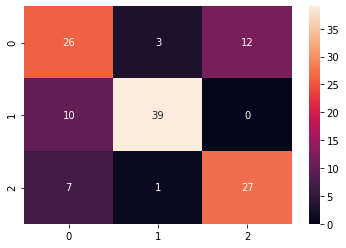

In [18]:
import seaborn as sns
sns.heatmap(cm, annot=True)

#### Conclusion- Here we can see that our accuracy is 73.6% which means our prediction is good but we need to classify it more for better precision. 